<a href="https://colab.research.google.com/github/thiru2024/Pathways-prediction-through-clustering/blob/main/K_Prototype_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kmodes

In [2]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [81]:
# Importing required packages
import numpy as np
import pandas as pd
import random
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
from sklearn.preprocessing import LabelEncoder
# from Cdatatype import datatypes
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

path = pd.read_csv('/content/drive/My Drive/test-properties-predicted.csv')
path2 = pd.read_csv('/content/drive/My Drive/train-properties.csv')
df = pd.DataFrame(path2)
df1 = pd.DataFrame(path)
df=df.drop(['Unnamed: 0'], axis=1)
df1=df1.drop(['Unnamed: 0'], axis=1)
# df = pd.concat([df2['Pathway'],df1], axis=1)
# df=df.drop(['NAME.1','HMDB_ID','SMILES','InChI','INCHIKEY','IUPACName','CHEMICAL_FORMULA','CID','Molecular_weight',	'XLogP',	'ExactMass',	'MonoisotopicMass',	'TPSA',	'Complexity',	'Charge',	'HBondDonorCount',
#                                                     'HBondAcceptorCount',	'RotatableBondCount',	'HeavyAtomCount',	'IsotopeAtomCount',	'AtomStereoCount',	'DefinedAtomStereoCount',	'UndefinedAtomStereoCount',
#                                                     'BondStereoCount',	'DefinedBondStereoCount',	'UndefinedBondStereoCount',	'CovalentUnitCount',	'Volume3D',	'XStericQuadrupole3D',	'YStericQuadrupole3D',	'ZStericQuadrupole3D',
#                                                     'FeatureCount3D',	'FeatureAcceptorCount3D',	'FeatureDonorCount3D',	'FeatureAnionCount3D',	'FeatureCationCount3D',	'FeatureRingCount3D',	'FeatureHydrophobeCount3D',
#                                                     'ConformerModelRMSD3D',	'EffectiveRotorCount3D',	'ConformerCount3D'], axis = 1)
le = LabelEncoder()
# df = df.apply(lambda col: le.fit_transform(df['Pathway'].astype(str)), axis=0, result_type='expand')
# df['Pathway'] = df['Pathway'].astype(str)
# # df['Pathway'] = le.fit_transform(df['Pathway'])
# df['Pathway'] = df['Pathway'].fillna('x')
# df = df.loc[df["Pathway"] != '']
# df['Pathway'] = le.fit_transform(df['Pathway'])
# df = df[~df['Pathway'].isnull()]
# df['Cluster'] = le.fit_transform(df['Cluster'])
# # df['Cluster'] = le.fit_transform(df['Cluster'])
dataset = df.fillna(df.median())
dataset = df.astype(float)
dataset1 = df1.fillna(df1.median())
dataset1 = df1.astype(float)
# dataset.info()
# dataset.tail()

In [77]:
dataset['end-cluster'].value_counts()

1.0    3508
0.0    1918
Name: end-cluster, dtype: int64

In [50]:
# dataset['Pathway'].value_counts()
# dataset['end-cluster'].value_counts()

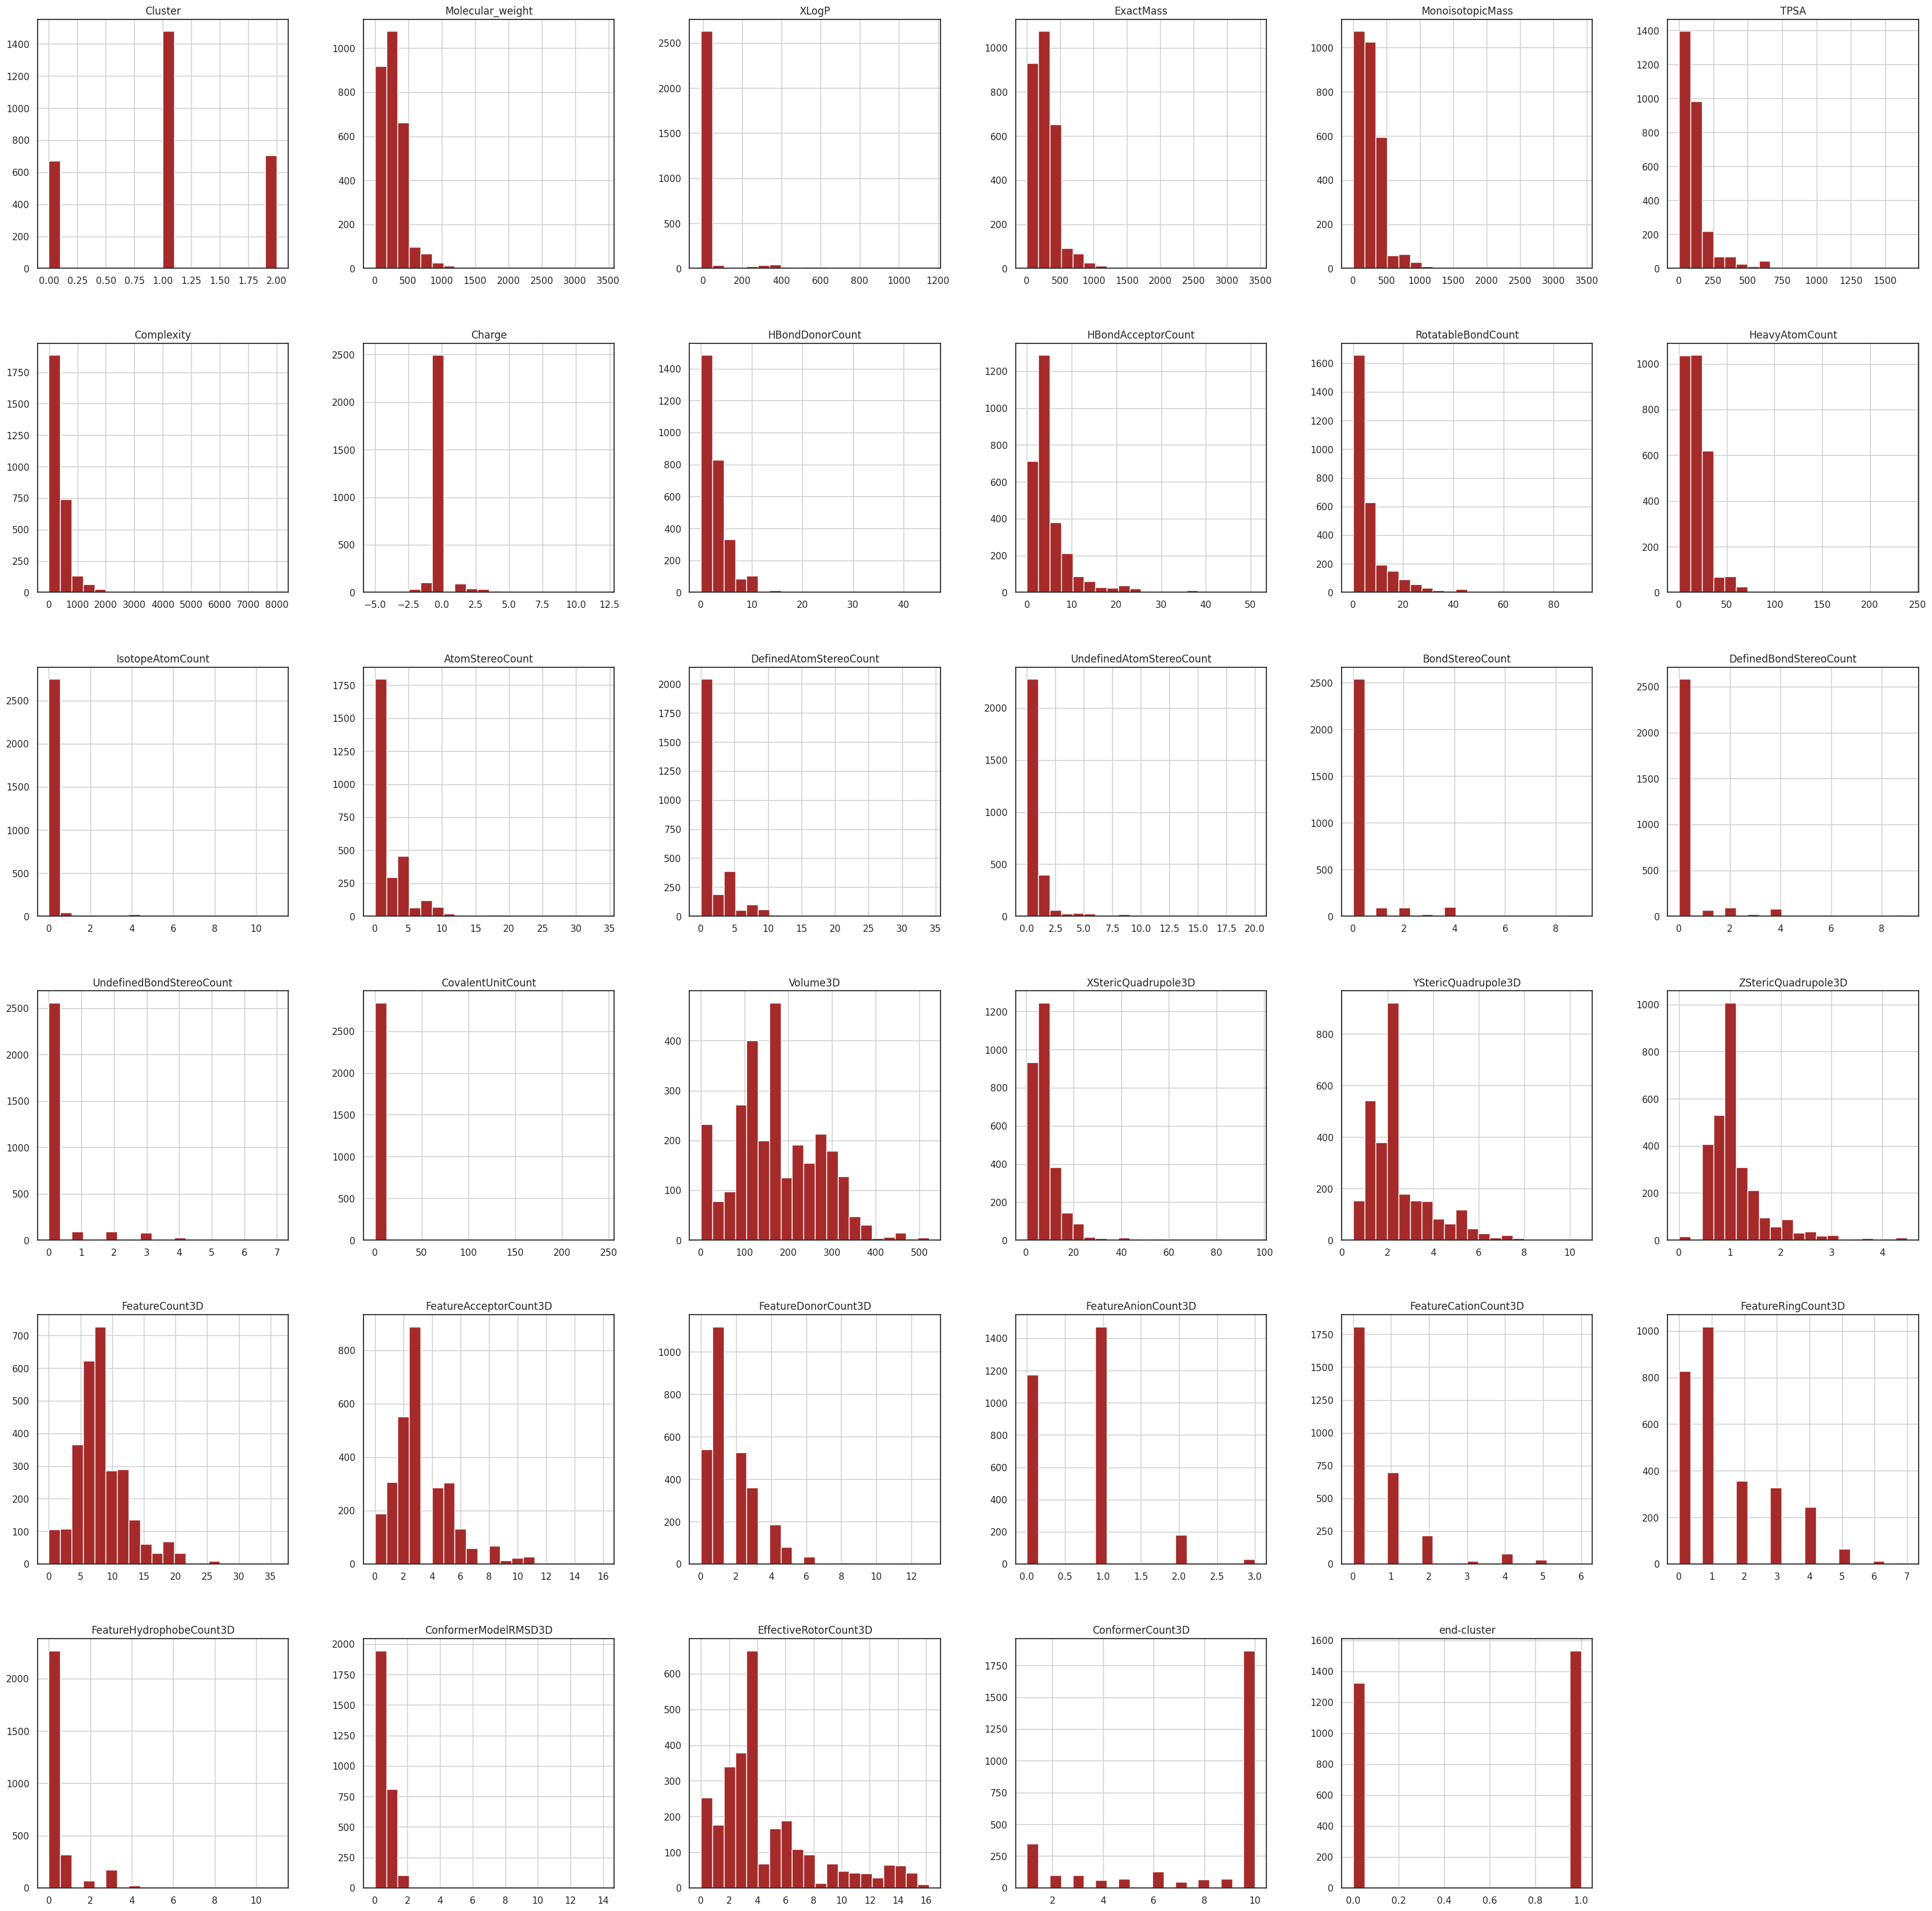

In [64]:
import seaborn as sns  #Python library for Vidualization
# def hist_box_plot(df,feature, fig_num):
sns.set(style='white',font_scale=1, rc={'figure.figsize':(40,40)})
ax=dataset.hist(bins=20,color='brown' )
    # sns.set(color_codes = 'Blue', style="whitegrid")
    # sns.set_style("whitegrid", {'axes.grid' : False})
    # sns.set_context(rc = {'patch.linewidth': 0.0})
    # fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(2,2))
    # filtered = df.loc[~np.isnan(df[feature]), feature]
    # sns.boxplot(filtered, ax = ax1, color = 'steelblue') # boxplot
    # sns.distplot(filtered, kde=True, hist=True, kde_kws={'linewidth': 1}, color = 'steelblue', ax = ax2) # histogram
    # plt.show()

In [9]:
# dataset = dataset.drop(['Pathway'], axis = 1)

In [82]:
from sklearn.decomposition import PCA
pca = PCA(9)
pca_2_result = pca.fit_transform(dataset)
pca_1_result = pca.fit_transform(dataset1)

print ('Cumulative variance explained by principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))
print(pca_2_result.shape)
print(pca_1_result.shape)

# from sklearn.decomposition import PCA
# pca = PCA(n_components=35, whiten=True)
# Num_features=Data.iloc[:,0:36].astype(int)
# x=Num_features
# principalComponents = pca.fit_transform(x)

# # Cumulative Explained Variance
# cum_explained_var = []
# for i in range(0, len(pca.explained_variance_ratio_)):
#     if i == 0:
#         cum_explained_var.append(pca.explained_variance_ratio_[i])
#     else:
#         cum_explained_var.append(pca.explained_variance_ratio_[i] +
#                                  cum_explained_var[i-1])

# print(cum_explained_var)

Cumulative variance explained by principal components: 99.98%
(5426, 9)
(2857, 9)


In [66]:
dataset.tail()

,Cluster,Molecular_weight,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,HBondAcceptorCount,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,end-cluster
2852,0.0,116.072,-0.3,116.010959,116.010959,74.6,119.0,0.0,2.0,4.0,...,4.0,0.0,2.0,0.0,0.0,0.0,0.4,2.0,5.0,0.0
2853,0.0,116.072,-0.3,116.010959,116.010959,74.6,119.0,0.0,2.0,4.0,...,4.0,0.0,2.0,0.0,0.0,0.0,0.4,2.0,5.0,0.0
2854,0.0,116.072,-0.3,116.010959,116.010959,74.6,119.0,0.0,2.0,4.0,...,4.0,0.0,2.0,0.0,0.0,0.0,0.4,2.0,5.0,0.0
2855,0.0,116.072,-0.3,116.010959,116.010959,74.6,119.0,0.0,2.0,4.0,...,4.0,0.0,2.0,0.0,0.0,0.0,0.4,2.0,5.0,0.0
2856,0.0,116.072,-0.3,116.010959,116.010959,74.6,119.0,0.0,2.0,4.0,...,4.0,0.0,2.0,0.0,0.0,0.0,0.4,2.0,5.0,0.0


[0.93630417 0.98223838 0.99376023 0.99926979 0.99968041 0.99987184
 0.99990491 0.99993555 0.99995418]


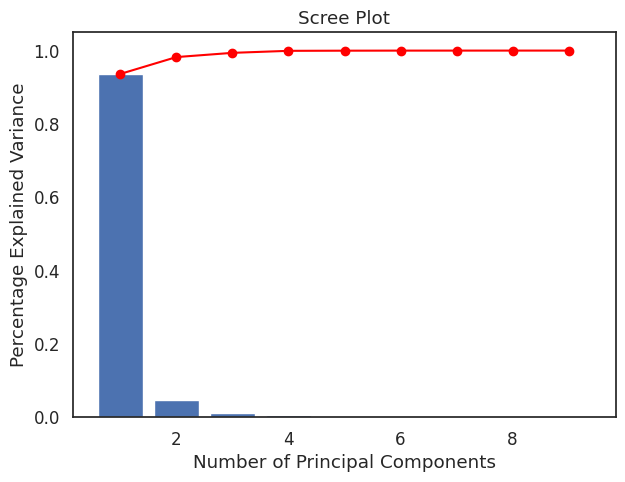

In [79]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*1
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Percentage Explained Variance")
    plt.title("Scree Plot")
    plt.show(block=False)
expvar = np.round(pca.explained_variance_ratio_,5)
expvar
print(pca.explained_variance_ratio_.cumsum())
display_scree_plot(pca)

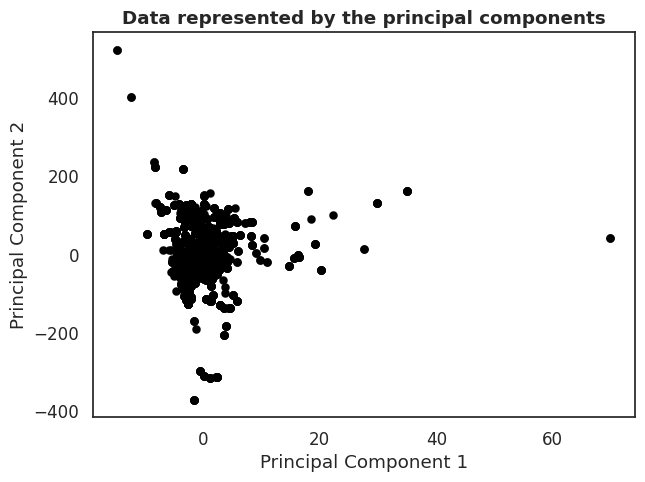

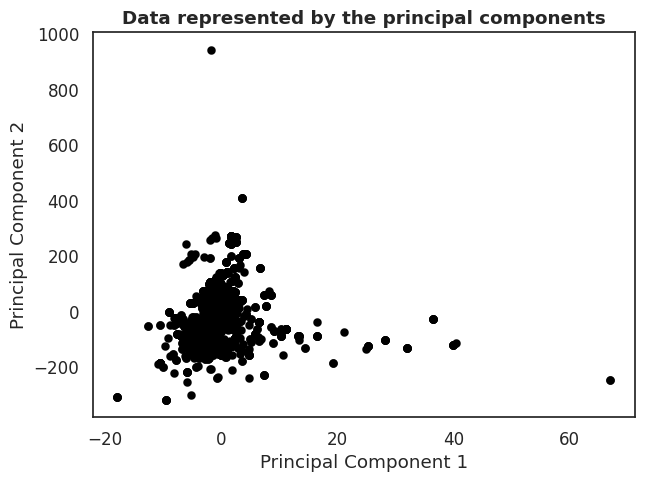

In [86]:
sns.set(style='white', rc={'figure.figsize':(7,5)},font_scale=1.1)

plt.scatter(x=pca_2_result[:2000, 7], y=pca_2_result[:2000, 2], color='black',lw=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data represented by the principal components',fontweight='bold')
plt.show()
plt.scatter(x=pca_1_result[:2000, 7], y=pca_1_result[:2000, 2], color='black',lw=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data represented by the principal components',fontweight='bold')
plt.show()

In [ ]:
# fig_num = 1
# for col in dataset.select_dtypes(include=[np.number]).columns:
#     if col in ['Cluster','Cluster2','Pathway','Molecular_weight',	'XLogP',	'ExactMass',	'MonoisotopicMass',	'TPSA',	'Complexity',	'Charge',	'HBondDonorCount',
#                                                     'HBondAcceptorCount',	'RotatableBondCount',	'HeavyAtomCount',	'IsotopeAtomCount',	'AtomStereoCount',	'DefinedAtomStereoCount',	'UndefinedAtomStereoCount',
#                                                     'BondStereoCount',	'DefinedBondStereoCount',	'UndefinedBondStereoCount',	'CovalentUnitCount',	'Volume3D',	'XStericQuadrupole3D',	'YStericQuadrupole3D',	'ZStericQuadrupole3D',
#                                                     'FeatureCount3D',	'FeatureAcceptorCount3D',	'FeatureDonorCount3D',	'FeatureAnionCount3D',	'FeatureCationCount3D',	'FeatureRingCount3D',	'FeatureHydrophobeCount3D',
#                                                     'ConformerModelRMSD3D',	'EffectiveRotorCount3D',	'ConformerCount3D']:
#         hist_box_plot(dataset,col, fig_num)
#         fig_num = fig_num + 1

In [ ]:
Data = dataset

In [ ]:
#Creating a function to plot Count plot
def count_plot(df,feature):
    sns.set(color_codes = 'Blue', style="whitegrid")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set_context(rc = {'patch.linewidth': 0.0})
    fig = plt.subplots(figsize=(10,10))
    sns.countplot(x=feature, data=df, color = 'steelblue') # countplot
    plt.show()
cat_cols = ['Cluster','end-cluster']

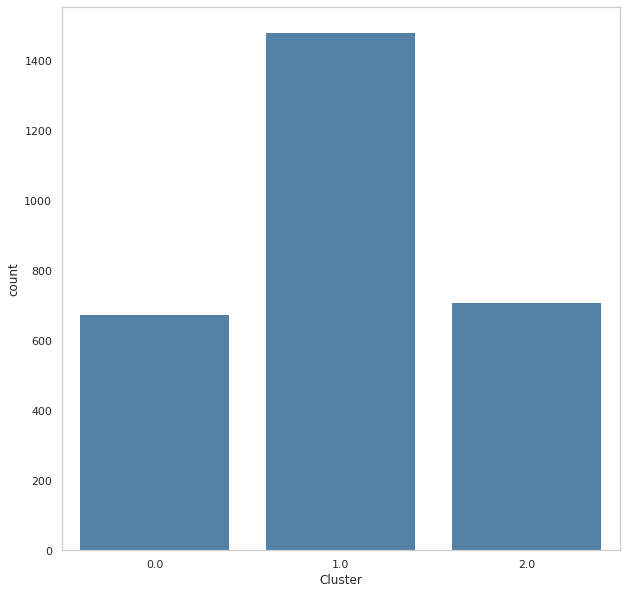

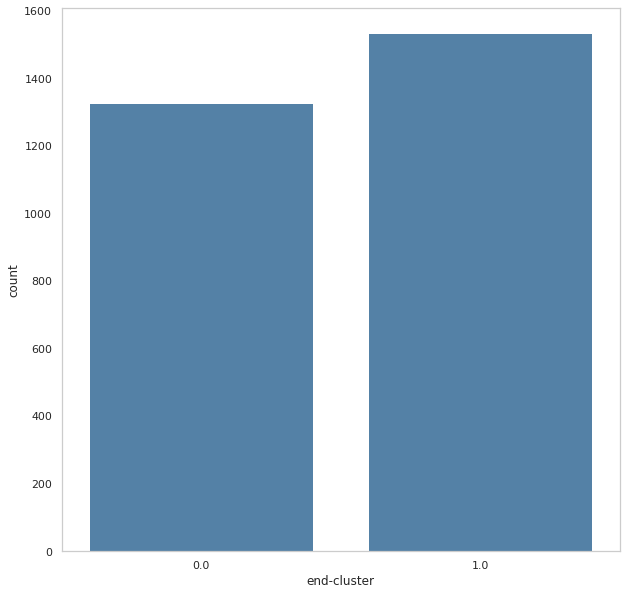

In [ ]:
for col in cat_cols[0:3]:
        count_plot(Data,col)

<AxesSubplot:ylabel='Density'>

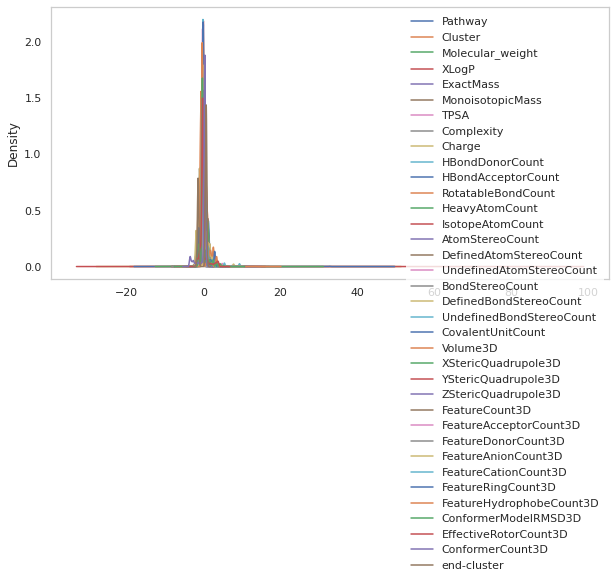

In [ ]:
# for y in Data.columns:
#     if(Data[y].dtype == np.float64):
#         Data[y] = Data[y].astype(int)
from sklearn.preprocessing import StandardScaler
# Standardize the data
Xp = Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xp)
X_scaled
pd.DataFrame(X_scaled,columns=Xp.columns).plot(kind='density',sharex=True,figsize=(10,5),layout=(5,1))

In [ ]:
Data_Correlation=dataset.iloc[:,0:36]
Data_Correlation.dtypes

Pathway                     float64
Cluster                     float64
Molecular_weight            float64
XLogP                       float64
ExactMass                   float64
MonoisotopicMass            float64
TPSA                        float64
Complexity                  float64
Charge                      float64
HBondDonorCount             float64
HBondAcceptorCount          float64
RotatableBondCount          float64
HeavyAtomCount              float64
IsotopeAtomCount            float64
AtomStereoCount             float64
DefinedAtomStereoCount      float64
UndefinedAtomStereoCount    float64
BondStereoCount             float64
DefinedBondStereoCount      float64
UndefinedBondStereoCount    float64
CovalentUnitCount           float64
Volume3D                    float64
XStericQuadrupole3D         float64
YStericQuadrupole3D         float64
ZStericQuadrupole3D         float64
FeatureCount3D              float64
FeatureAcceptorCount3D      float64
FeatureDonorCount3D         

In [ ]:
from dython.model_utils import metric_graph
from dython.nominal import associations

def associations_example():
    associations(Data_Correlation,nominal_columns = ['Pathway'])

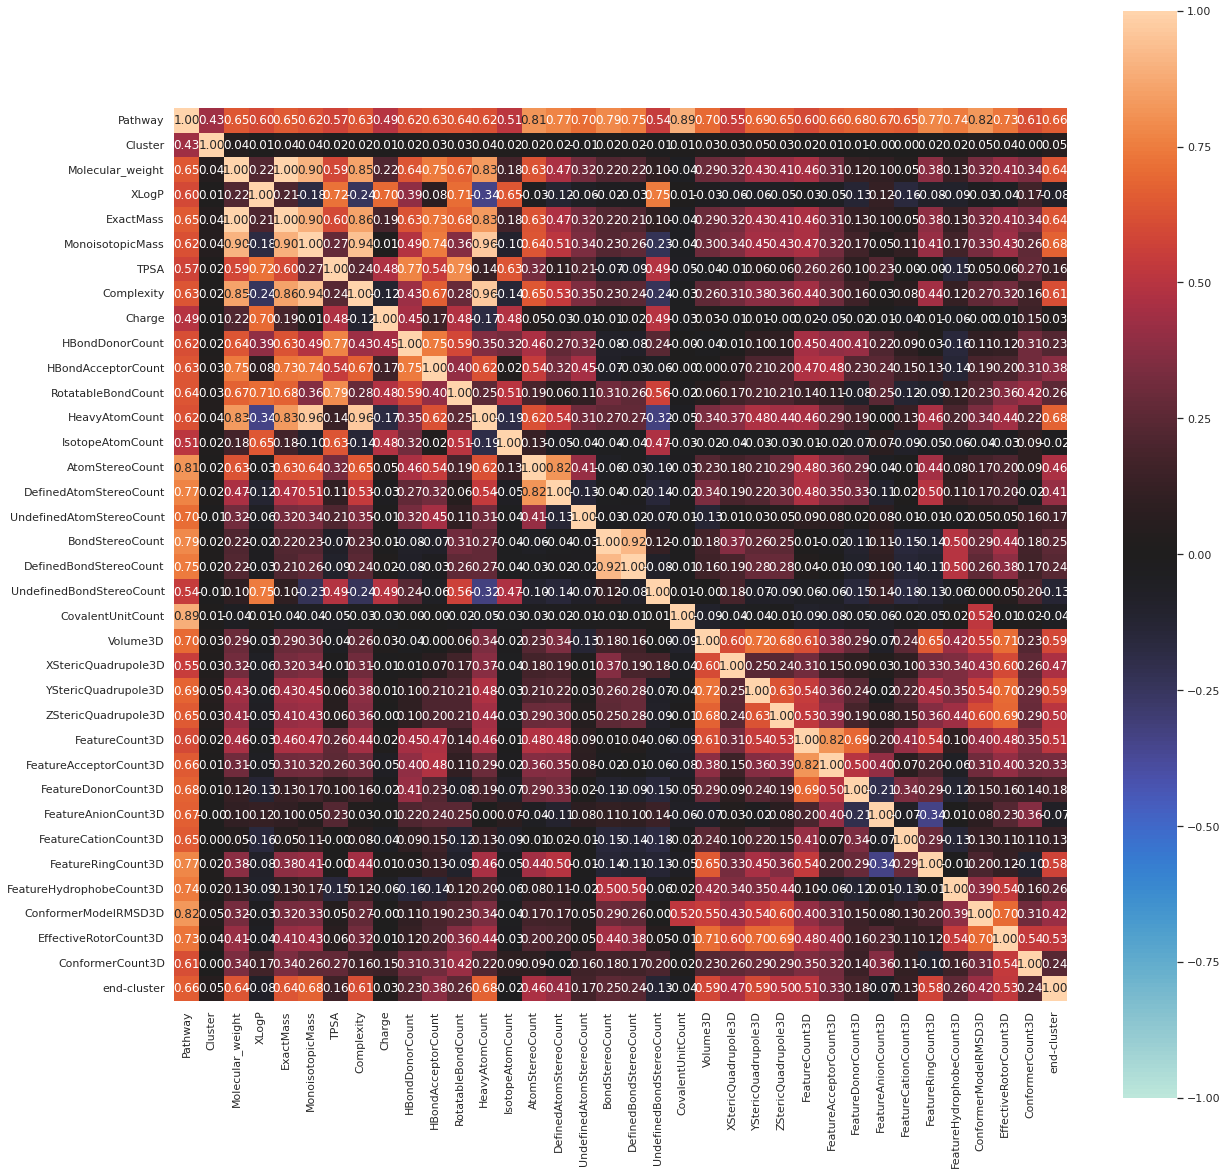

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,20
associations_example()

In [ ]:
# Standardizing all the numerical variables
# from sklearn import preprocessing
# Num_features_1=Data.iloc[:,0:36].astype(bool)
# Data[Num_features]=preprocessing.MinMaxScaler().fit_transform(Data[Num_features_1])

In [ ]:
#Hopkins Statistic is a way of measuring the cluster tendency of a data set.
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [ ]:
hopkins(Data)

0.9986811261708928

In [ ]:
# # category=Data.iloc[:,0:168]
# Num_features =Data.select_dtypes(include=[category]).columns
# hopkins(Data[Num_features])

In [ ]:
# #Principal Component
# from sklearn.decomposition import PCA
# pca = PCA(n_components=35, whiten=True)
# Num_features=Data.iloc[:,0:36].astype(bool)
# x=Num_features
# principalComponents = pca.fit_transform(x)

# # Cumulative Explained Variance
# cum_explained_var = []
# for i in range(0, len(pca.explained_variance_ratio_)):
#     if i == 0:
#         cum_explained_var.append(pca.explained_variance_ratio_[i])
#     else:
#         cum_explained_var.append(pca.explained_variance_ratio_[i] +
#                                  cum_explained_var[i-1])

# print(cum_explained_var)

In [ ]:
principalDf  = pd.DataFrame(data = pca_2_result).reset_index(drop=True)
principalDf

,0,1,2,3,4,5,6,7,8
0,-118.705827,-32.648326,-45.411119,85.137737,-15.655335,-19.439428,0.114507,-3.009409,-0.319561
1,-118.705780,-32.648259,-45.411370,85.138248,-15.655688,-19.439754,0.114886,-3.009573,-0.317885
2,806.036276,-39.293702,-140.404936,-92.415166,-12.479761,14.180028,3.055129,-3.313274,1.628888
3,409.159918,-53.975922,-207.504617,44.528216,-3.978156,-15.285036,-1.520365,-1.842678,0.465610
4,776.945690,-22.354957,-150.817825,-73.572617,-25.577863,9.877362,3.487128,-4.593092,1.788314
...,...,...,...,...,...,...,...,...,...
2852,-350.808069,-51.604012,81.142066,-15.099359,-4.706427,5.437762,-0.080368,-0.340453,-0.561520
2853,-350.808069,-51.604012,81.142066,-15.099359,-4.706427,5.437762,-0.080368,-0.340453,-0.561520
2854,-350.808069,-51.604012,81.142066,-15.099359,-4.706427,5.437762,-0.080368,-0.340453,-0.561520
2855,-350.808069,-51.604012,81.142066,-15.099359,-4.706427,5.437762,-0.080368,-0.340453,-0.561520


In [ ]:
finalDf_Cat = pd.concat([Data[cat_cols],principalDf], axis = 1)
finalDf_Cat.head(2)

,Cluster,0,1,2,3,4,5,6,7,8
0,0.0,-118.705827,-32.648326,-45.411119,85.137737,-15.655335,-19.439428,0.114507,-3.009409,-0.319561
1,1.0,-118.705780,-32.648259,-45.411370,85.138248,-15.655688,-19.439754,0.114886,-3.009573,-0.317885


<function matplotlib.pyplot.show>

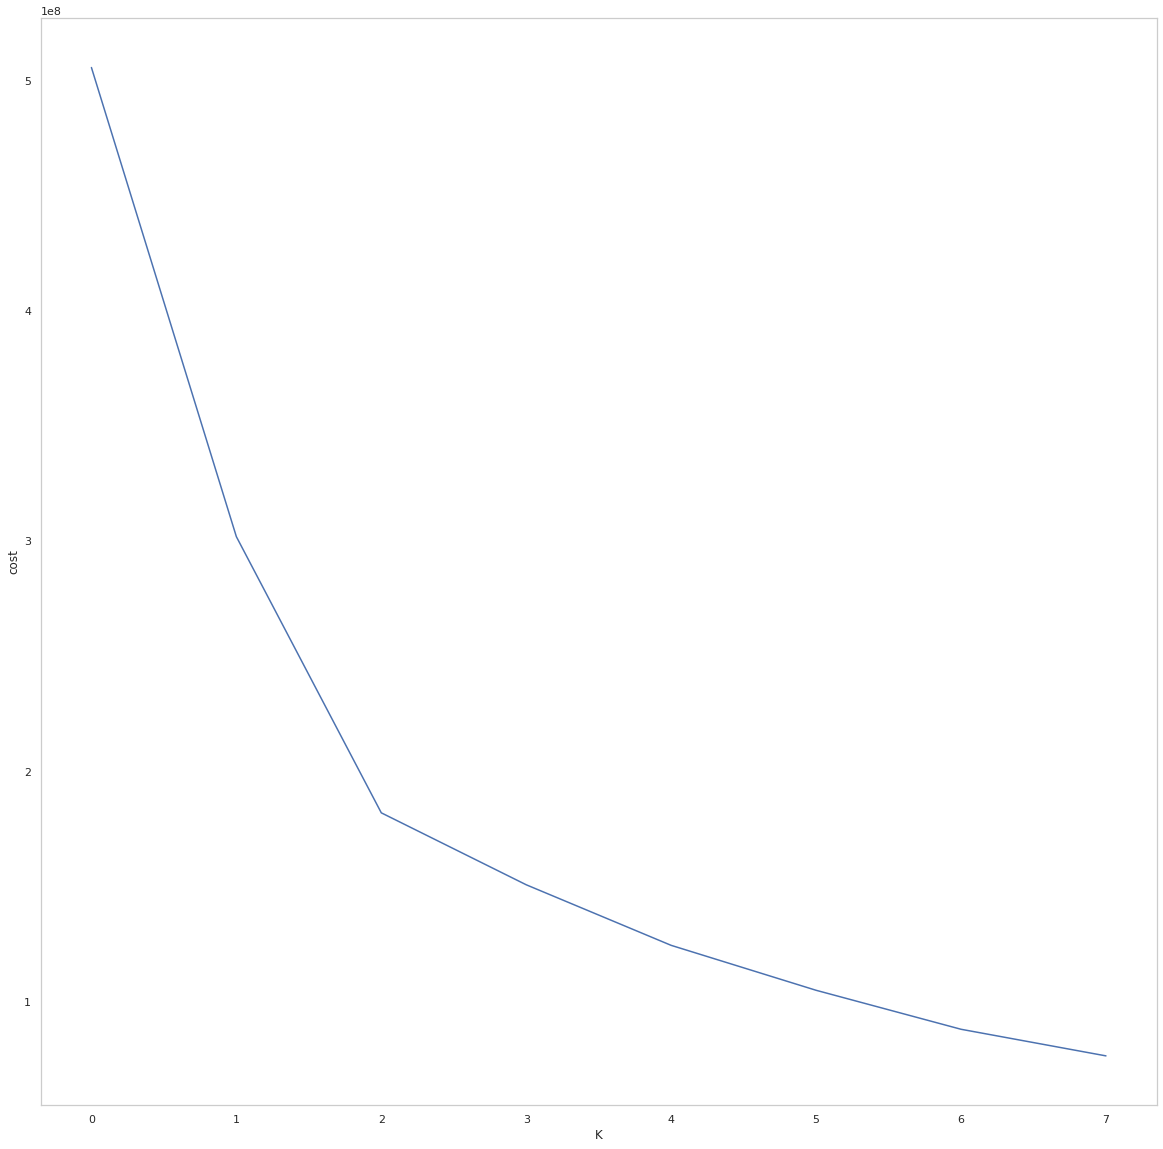

In [ ]:
#Choosing optimal K value
cost = []
X = finalDf_Cat
for num_clusters in list(range(2,10)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=42,n_jobs=-2,max_iter=15,n_init=50)
    kproto.fit_predict(X, categorical=[0])
    cost.append(kproto.cost_)

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

In [ ]:
# Converting the dataset into matrix
X = finalDf_Cat.values

In [ ]:
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=2, init='Huang', verbose=1, random_state=42,max_iter=20, n_init=20,n_jobs=-2,gamma=.25)

In [ ]:
clusters = kproto.fit(X, categorical=[0])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 391, ncost: 505775981.78490573
Run: 1, iteration: 2/20, moves: 21, ncost: 505662630.4736257
Run: 1, iteration: 3/20, moves: 0, ncost: 505662630.4736257
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 1177, ncost: 808553224.2389195
Run: 2, iteration: 2/20, moves: 1128, ncost: 551487204.3621062
Run: 2, iteration: 3/20, moves: 445, ncost: 506954989.8289741
Run: 2, iteration: 4/20, moves: 70, ncost: 505669731.6097574
Run: 2, iteration: 5/20, moves: 5, ncost: 505662630.4736274
Run: 2, iteration: 6/20, moves: 0, ncost: 505662630.4736274
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 875, ncost: 516565992.45767957
Run: 3, iteration: 2/20, moves: 209, ncost: 505956161.12260026
Run: 3, iteration: 3/20, moves: 30, ncost: 505669731.60975987
Run: 3, iteration: 

In [ ]:
import pickle
pickle.dump(clusters, open("/content/drive/My Drive/model.pkl", "wb"))

In [ ]:
import pickle
loaded_model = pickle.load(open("/content/drive/My Drive/model.pkl", 'rb'))
loaded_model

KPrototypes(gamma=0.25, init='Huang', max_iter=20, n_clusters=2, n_init=20,
            n_jobs=-2, random_state=42, verbose=1)

In [ ]:
#Visualize K-Prototype clustering on the PCA projected Data
# df=pd.DataFrame(finalDf_Cat)
# df['Cluster_id']=clusters
# print(df['Cluster_id'].value_counts())
# sns.pairplot(df,hue='Cluster_id',palette='Dark2',diag_kind='kde')
pre = clusters.predict(X, categorical=[0])

In [ ]:
dataset['end-cluster'] = pre

In [ ]:
dataset.to_csv('/content/drive/My Drive/test-properties-predicted.csv')